In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, splrep, splev
# position 0..100, R, G, B
interpolation_points = np.array([
    [0, 0,   7, 100],
    [16, 32, 107, 203],
    [42, 237, 255, 255],
    [64, 255, 170,   0],
    [86, 0, 2, 0],
    [100, 0, 0, 0]])
points_count = interpolation_points.shape[0]

COLOR_BITS = 8


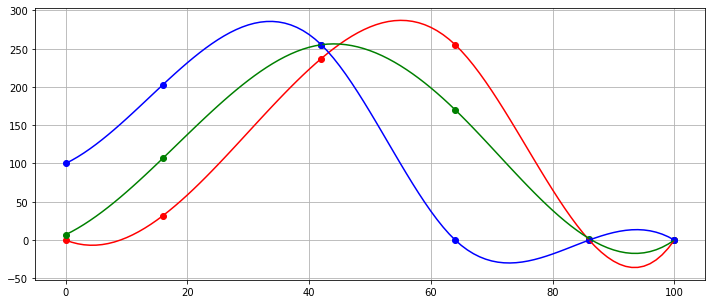

In [2]:
R = interp1d(interpolation_points[:,0], interpolation_points[:,1], kind='cubic')
G = interp1d(interpolation_points[:,0], interpolation_points[:,2], kind='cubic')
B = interp1d(interpolation_points[:,0], interpolation_points[:,3], kind='cubic')

iterations_range = np.arange(101)

plt.figure(figsize=(12,5))
plt.grid()
for c, p in zip(['r', 'g', 'b'], interpolation_points[:,1:].T):
    plt.plot(interpolation_points[:,0], p, c + 'o')
plt.plot(R(iterations_range), c='r')
plt.plot(G(iterations_range), c='g')
plt.plot(B(iterations_range), c='b')
plt.show()

In [3]:
# LUT
color_spectrum = np.stack([R(iterations_range), G(iterations_range), B(iterations_range)], axis=1)
color_spectrum = ((color_spectrum - np.min(color_spectrum)) / (np.max(color_spectrum)-np.min(color_spectrum))*(2**COLOR_BITS-1)).astype(int)

# Fonction "LUT"
def LUT(x):
    if isinstance(x, int) or isinstance(x, float):
        return color_spectrum[x, :]
    else:
        output = np.zeros([*x.shape, 3], dtype=int)
        for di, d in enumerate(x):
            output[di] = color_spectrum[d.astype(int),:]
        return output

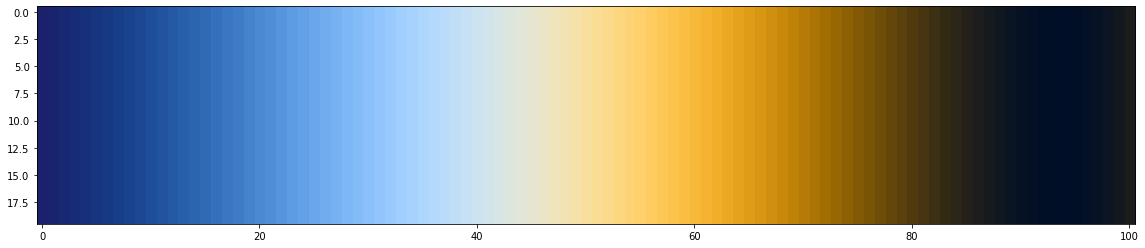

In [9]:
strip = np.repeat(np.arange(101), 20).reshape(20,-1, order='F')

strip_colors = LUT(strip)

plt.figure(figsize=(20,4))
plt.imshow(strip_colors)
plt.show()


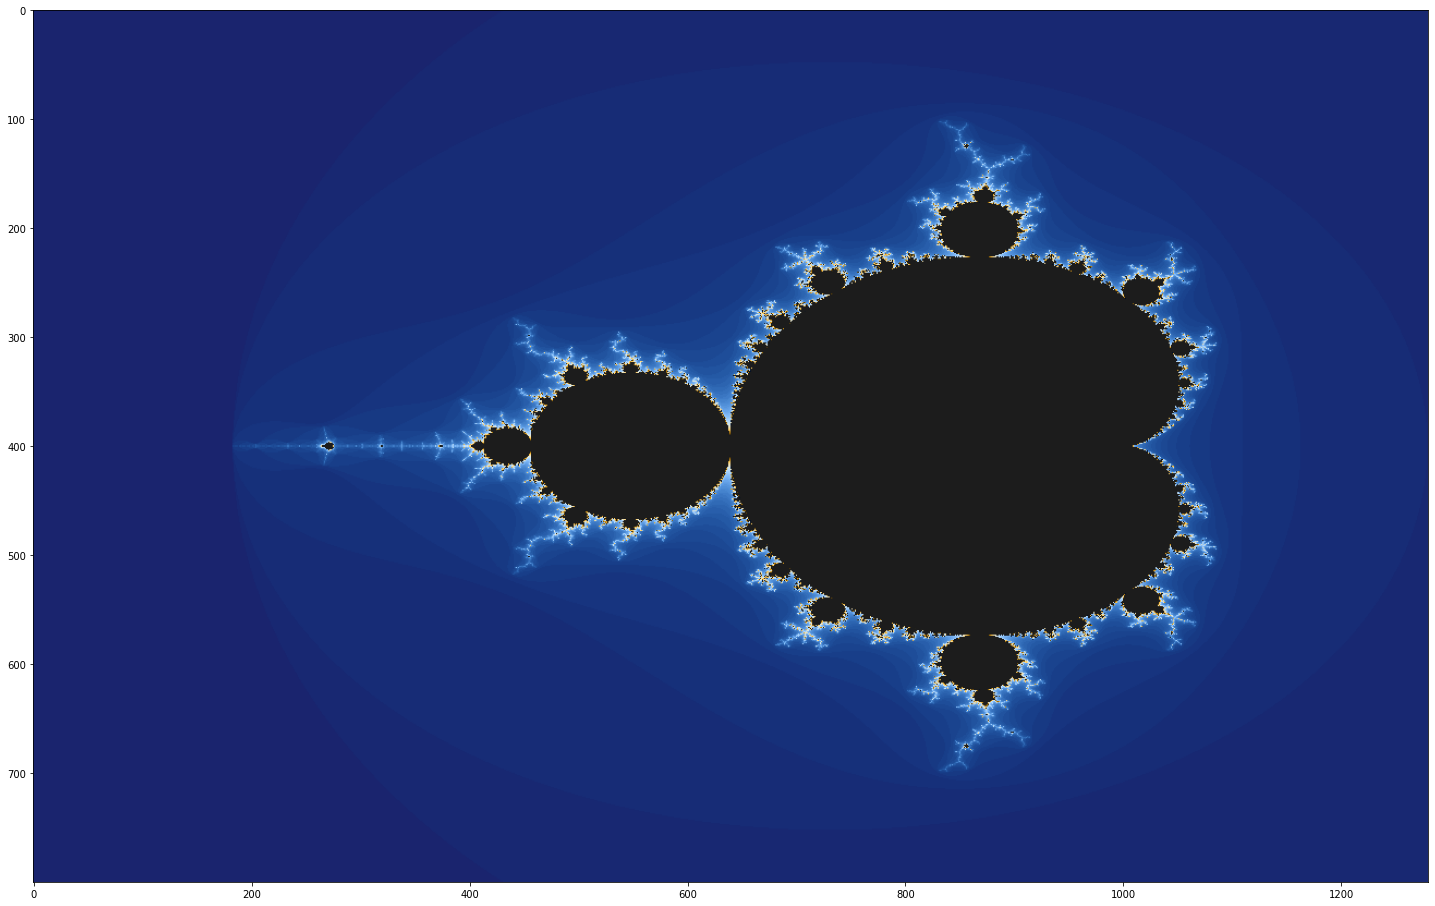

In [5]:
mandelbrot_iterations = np.load('../Tests/mandelbrot_iterations.npy', allow_pickle=True)

mandelbrot = LUT(mandelbrot_iterations)

plt.figure(figsize=(25,20))
plt.imshow(mandelbrot)
plt.show()

In [6]:
LUT_file = "colors_LUT.vhd"

R_vectors = ', '.join([f'"{a:0{COLOR_BITS}b}"' for a in color_spectrum[:,0]])
G_vectors = ', '.join([f'"{a:0{COLOR_BITS}b}"' for a in color_spectrum[:,1]])
B_vectors = ', '.join([f'"{a:0{COLOR_BITS}b}"' for a in color_spectrum[:,2]])

LUT_file_data = f"""

library IEEE;
use IEEE.STD_LOGIC_1164.all;

package colors_LUT is

    type colors_array is array (0 to 100) of std_logic_vector({COLOR_BITS-1} downto 0);
    constant R : colors_array := ({R_vectors});
    constant G : colors_array := ({G_vectors});
    constant B : colors_array := ({B_vectors});

end package colors_LUT;
"""

with open(LUT_file, 'w') as f:
    f.write(LUT_file_data)